# YOLO pose annotation pipeline
A complete pipeline for augmented human pose annotation for fine-tuning YOLO models with custom datasets.

![Pose Annotation GUI](../assets/pose-estimation-examples.avif)

# 📥 Download or create some data
The first step is to get image frames to fine-tune our model on.

An example small dataset is included in this project in `/your-dataset`

Other publically available pose estimation datasets:
- [Leeds Sports Pose (LSP) Dataset](http://www.comp.leeds.ac.uk/mat4saj/lsp_dataset.zip)


# 📂 Splitting dataset
Once the dataset is chosen, we split it into **training**, **validation**, and **test** sets.

My recommendation is to split them as follows:

- **70%** of the images will be used for training.
- **15%** will be set aside for validation.
- **15%** will be set aside for testing (optional).
- Structure your datased as follows:

<pre>
📂your-dataset/
├── 📂train/
│   ├── 📂images/
├── 📂val/
│   ├── 📂images/
├── 📂test/
│   ├── 📂images/
</pre>



# 🤖 Running automatic YOLO pose annotation
We use a **pretrained YOLOv8x-pose** model (largest and best performing model) to automatically annotate keypoints in each image.

- The model detects a **bounding box** and **17 keypoints** per person.
- The detections are saved in YOLO format inside `train/labels/`, `val/labels/`, and `test/labels/`.
- Annotated images are saved in `train/annotated_images/`, `val/annotated_images/`, and `test/annotated_images/`, using the [Supervision](https://github.com/roboflow/supervision) - an open-source annotation and visualisation toolkit by [Roboflow](https://github.com/Roboflow). 

**Note:** The annotations can be refined manually in the next step.



**Action:** Run the following cell to apply the automatic keypoint annotation, and replace your the image path arguments with your own:

**TO DO:**
- revise tool to not use Tkinter
- add paths as arguments.
- add optional argument to plot example poses using supervision package

In [34]:
!python ../auto-annotator.py ../your-dataset/train/images ../your-dataset/val/images ../your-dataset/test/images

✅ Processed: ../your-dataset/train/images\001.jpg


  0%|          | 0.00/133M [00:00<?, ?B/s]
  1%|          | 1.00M/133M [00:00<00:13, 10.4MB/s]
  2%|▏         | 2.38M/133M [00:00<00:10, 12.6MB/s]
  3%|▎         | 3.62M/133M [00:00<00:11, 11.8MB/s]
  4%|▎         | 4.88M/133M [00:00<00:11, 11.8MB/s]
  5%|▍         | 6.25M/133M [00:00<00:10, 12.4MB/s]
  6%|▌         | 7.88M/133M [00:00<00:09, 13.8MB/s]
  7%|▋         | 9.50M/133M [00:00<00:08, 14.8MB/s]
  8%|▊         | 11.0M/133M [00:00<00:08, 14.6MB/s]
 10%|▉         | 12.8M/133M [00:00<00:08, 15.6MB/s]
 11%|█         | 14.5M/133M [00:01<00:07, 16.3MB/s]
 12%|█▏        | 16.1M/133M [00:01<00:07, 16.1MB/s]
 13%|█▎        | 17.9M/133M [00:01<00:07, 16.8MB/s]
 15%|█▍        | 19.6M/133M [00:01<00:06, 17.0MB/s]
 16%|█▌        | 21.4M/133M [00:01<00:06, 17.1MB/s]
 17%|█▋        | 23.2M/133M [00:01<00:06, 17.4MB/s]
 19%|█▉        | 25.0M/133M [00:01<00:06, 17.4MB/s]
 20%|██        | 26.8M/133M [00:01<00:06, 17.3MB/s]
 21%|██▏       | 28.5M/133M [00:01<00:06, 17.6MB/s]
 23%|██▎       | 30.


✅ Processed: ../your-dataset/train/images\007.jpg
✅ Processed: ../your-dataset/train/images\012.jpg
✅ Processed: ../your-dataset/train/images\013.jpg
✅ Processed: ../your-dataset/train/images\041.jpg
✅ Processed: ../your-dataset/train/images\058.jpg
✅ Processed: ../your-dataset/train/images\101.jpg
✅ Processed: ../your-dataset/train/images\161.jpg
✅ Processed: ../your-dataset/train/images\181.jpg
✅ Processed: ../your-dataset/train/images\201.jpg
✅ Processed: ../your-dataset/train/images\241.jpg
✅ Processed: ../your-dataset/train/images\251.jpg
✅ Processed: ../your-dataset/train/images\361.jpg
✅ Processed: ../your-dataset/train/images\391.jpg
✅ Processed: ../your-dataset/train/images\401.jpg
✅ Processed: ../your-dataset/val/images\046.jpg
✅ Processed: ../your-dataset/val/images\501.jpg
✅ Processed: ../your-dataset/val/images\521.jpg
✅ Processed: ../your-dataset/test/images\761.jpg
✅ Processed: ../your-dataset/test/images\841.jpg
✅ Processed: ../your-dataset/test/images\1021.jpg


Once running this, your annotation `.txt` file and corresponding annotated images will be saved into new folders in the same directories, as follows:

<pre>
📂your-dataset/
├── 📂train/
│   ├── 📂images/
│   ├── 📂labels/
│   ├── 📂annotated_images/
├── 📂val/
│   ├── 📂images/
│   ├── 📂labels/
│   ├── 📂annotated_images/
├── 📂test/
│   ├── 📂images/
│   ├── 📂labels/
│   ├── 📂annotated_images/
</pre>

You can review the annotations in each `/annotated_images` folder, and note any that are in need of further refinement.

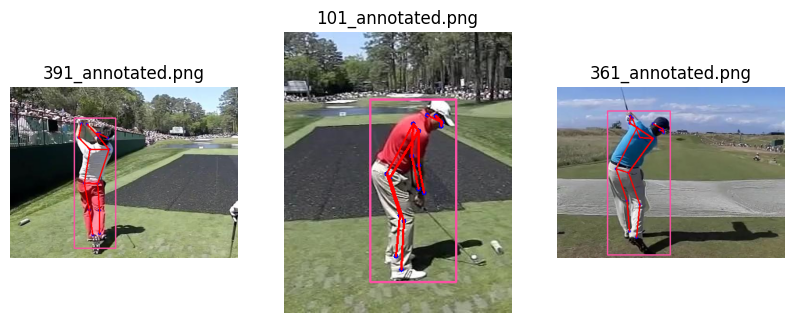

In [35]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image

# Define annotated images path
annotated_folder = "../your-dataset/train/annotated_images"

# Get and randomly select up to 3 annotated images
images = [f for f in os.listdir(annotated_folder) if f.endswith("_annotated.png")]
sampled_images = random.sample(images, min(3, len(images)))

# Plot images
fig, axes = plt.subplots(1, len(sampled_images), figsize=(10, 5))
if len(sampled_images) == 1:
    axes = [axes]  # Ensure it's iterable if only one image

for ax, img_name in zip(axes, sampled_images):
    img = Image.open(os.path.join(annotated_folder, img_name))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(img_name)

plt.show()

# ✏️ Refining annotations (Semi-Auto)
After automatic annotation, some keypoints may be incorrectly placed. 

- We use a interactive **Tkinter GUI tool** to allow the user to adjust incorrect keypoints by simply clicking and dragging.
- The corrected labels will overwrite the ones generated by YOLO.

**Action:** Run the line below to run the `semi_auto_annotator.py` script and refine keypoints.

![Pose Annotation GUI](../assets/gui.gif)


In [36]:
!python ../semi-auto-annotator.py

# 🤖🎯 Fine-tuning YOLO pose model
Now that we have annotated data, we can fine-tune a YOLO pose model using our dataset. This step adapts the pre-trained model to better detect keypoints in our specific dataset.


**1. Create a YAML file**

Create a file called `your-dataset.yaml` in your project directory:

``` yaml
# Custom Dataset Configuration for YOLO Pose Training

path: ./your-dataset  # Path to dataset root
train: train/images  # Path to training images
val: val/images  # Path to validation images
test: test/images  # Path to test images (optional but recommended)

# Number of keypoints and skeleton structure
kpt_shape: [17, 3]  # 17 keypoints, 3 values (x, y, visibility)

# Class definitions (For pose estimation, typically only one class: "person")
names:
  0: person

```

**2. Training**

Set up training settings.

**Training Setup:**
- Model: YOLOv8s-pose
- Epochs: 10 (can be adjusted for better performance)
- Image size: 640×640 pixels
- Optimizer: Adaptive learning rate
- Checkpointing: The model is saved after training for inference and evaluation.
- Validation: After training, the model is evaluated on the validation dataset to check its accuracy.


**Action:** Run the following cell to fine-tune YOLO:

In [2]:
from ultralytics import YOLO
from ultralytics.utils.plotting import plot_results

# Load the model
model = YOLO("yolov8s-pose.pt")  # Start with a pre-trained model

# Train on the custom dataset
results = model.train(
    data="your-dataset.yaml",  # Path to dataset config
    epochs=10,                # Number of training epochs
    imgsz=640,                # Image size (640x640)
    batch=16,                 # Adjust batch size based on available GPU memory
    save=True,                # Save trained model
    val=True                  # Perform validation
)

c:\Users\KG\AppData\Local\Programs\Python\Python311\Lib\site-packages\ultralytics\nn\tasks.py:527: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_

# 📊 Visualising training results
After training, we can analyse the **loss curves** and **metrics** to evaluate performance.

- **Box Loss:** Measures localization accuracy.
- **Pose Loss:** Measures keypoint prediction error.
- **mAP Metrics:** Measure precision & recall for pose estimation.

**Action:** Run the following cell to display training plots:


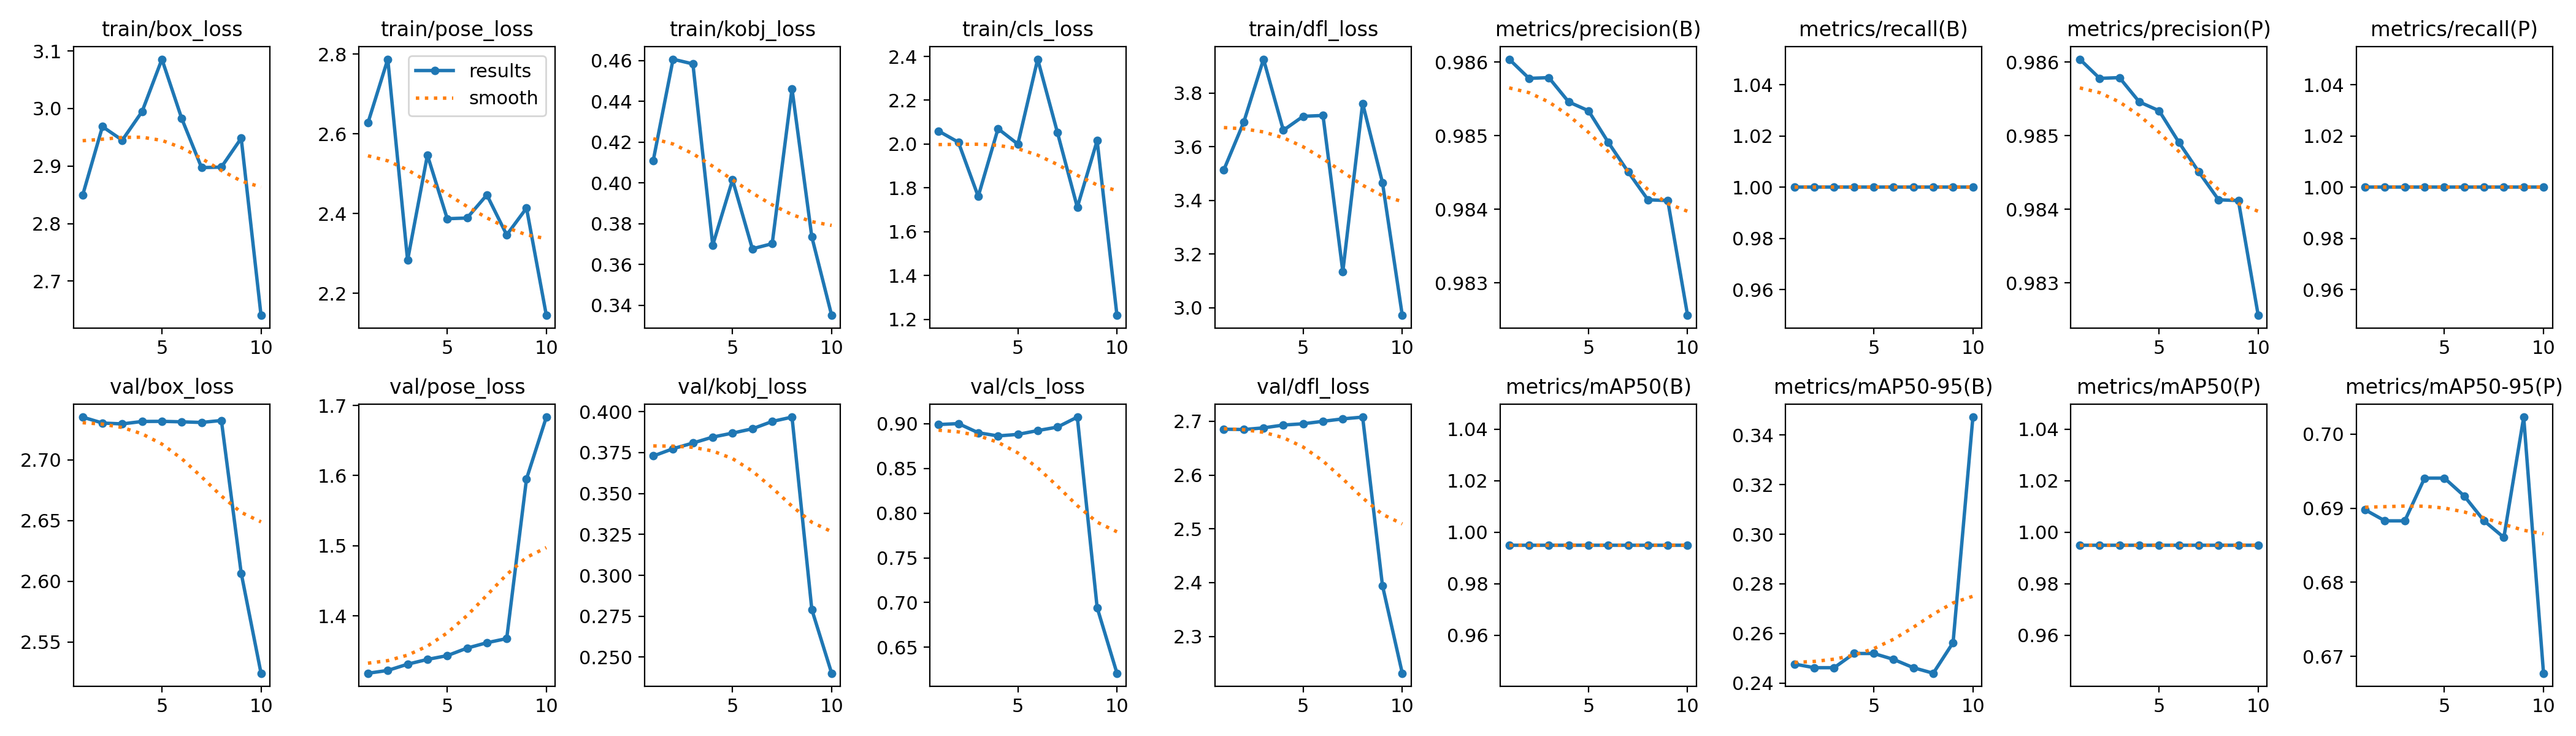

In [7]:
from IPython.display import display
from PIL import Image
import os

# Find the latest run
latest_run = sorted(os.listdir("runs/pose"), reverse=True)[0]
results_fig = os.path.join("runs/pose", latest_run, "results.png")

# Display the image
display(Image.open(results_fig))
